In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [3]:
company_dummies = pd.get_dummies(df.company)
job_dummies = pd.get_dummies(df.job)
degree_dummies = pd.get_dummies(df.degree)

In [4]:
dummies = pd.concat([company_dummies, job_dummies, degree_dummies], axis="columns")
dummies.head()

,abc pharma,facebook,google,business manager,computer programmer,sales executive,bachelors,masters
0,0,0,1,0,0,1,1,0
1,0,0,1,0,0,1,0,1
2,0,0,1,1,0,0,1,0
3,0,0,1,1,0,0,0,1
4,0,0,1,0,1,0,1,0


In [5]:
dummies.drop(["abc pharma", "business manager", "bachelors"], axis="columns", inplace=True)

In [6]:
df.drop(["company", "job", "degree"], axis="columns", inplace=True)

In [7]:
df = pd.concat([dummies, df], axis="columns")

In [8]:
x = df.drop(["salary_more_then_100k"], axis="columns")
y = df.salary_more_then_100k

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dtc = DecisionTreeClassifier()

In [12]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [13]:
dtc.score(xtest, ytest)

0.75

In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
y_predicted = dtc.predict(xtest)

In [16]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)
cm

array([[1, 0],
       [1, 2]], dtype=int64)

In [17]:
import seaborn as sb

Text(51.0, 0.5, 'truth')

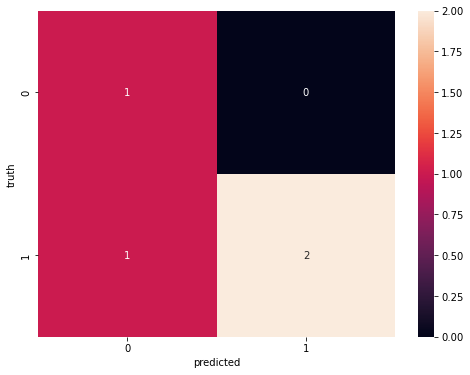

In [18]:
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")

In [19]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.drop(["customer_id"], axis="columns", inplace=True)

In [21]:
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [22]:
country_dummies = pd.get_dummies(df.country, prefix="country")
gender_dummies = pd.get_dummies(df.gender, prefix="gender")

In [23]:
dummies = pd.concat([country_dummies, gender_dummies], axis="columns")

In [24]:
df.drop(["country", "gender"], axis="columns", inplace=True)

In [25]:
df = pd.concat([dummies, df], axis="columns")

In [26]:
x = df.drop(["churn"], axis="columns")
y = df.churn

In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [29]:
xtrain_scaled = scaler.fit_transform(xtrain)

In [30]:
dtc.fit(xtrain_scaled, ytrain)

DecisionTreeClassifier()

In [34]:
xtest_scaled = scaler.fit_transform(xtest)

In [36]:
dtc.score(xtest_scaled, ytest)

0.7948

In [37]:
y_predicted = dtc.predict(xtest_scaled)

In [39]:
cm = confusion_matrix(y_true=ytest, y_pred=y_predicted)
cm

array([[1716,  264],
       [ 249,  271]], dtype=int64)

Text(51.0, 0.5, 'truth')

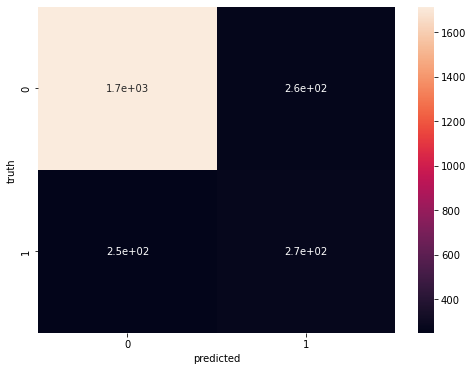

In [40]:
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("truth")